In [ ]:
FLUID = WATER

In [19]:
import random

import CoolProp
import CoolProp.CoolProp as CP
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd

In [2]:
fig = plt.figure(figsize=(10, 5))
# ax1 = fig.add_axes((0.08, 0.1, 0.32, 0.83))
ax2 = fig.add_axes((0.50, 0.1, 0.32, 0.83))

FLUID = "Water"

BICUBIC = CoolProp.AbstractState("BICUBIC&HEOS", FLUID)
# TTSE = CoolProp.AbstractState("TTSE&HEOS", FLUID)
EOS = CoolProp.AbstractState("HEOS", FLUID)

T = np.linspace(CP.PropsSI(FLUID, "Tmin") + 0.1,
                CP.PropsSI(FLUID, "Tcrit") - 0.01, 300)
pV = CP.PropsSI("P", "T", T, "Q", 1, FLUID)
hL = CP.PropsSI("Hmass", "T", T, "Q", 0, FLUID)
hV = CP.PropsSI("Hmass", "T", T, "Q", 1, FLUID)

# HHH1, PPP1, EEE1 = [], [], []
HHH2, PPP2, EEE2 = [], [], []

cNorm = colors.LogNorm(vmin=1e-12, vmax=10)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap("jet"))
counter = 0
while counter < 40000:  # a_useless_counter in range(40000):

    h = random.uniform(150000, 590000)
    p = 10**random.uniform(np.log10(100000), np.log10(7000000))
    CP.set_debug_level(0)
    try:

        EOS.update(CoolProp.HmassP_INPUTS, h, p)
        rhoEOS = EOS.rhomolar()
        TEOS = EOS.T()

        # TTSE.update(CoolProp.HmassP_INPUTS, h, p)
        # rhoTTSE = TTSE.rhomolar()
        # TTTSE = TTSE.T()

        BICUBIC.update(CoolProp.HmassP_INPUTS, h, p)
        rhoBICUBIC = BICUBIC.rhomolar()
        TBICUBIC = BICUBIC.T()
        
        

        HHH2.append(h)
        PPP2.append(p)
        EEE2.append(errorBICUBIC)

    except ValueError as VE:
        print("ERROR", VE)
        pass
    counter += 1
# SC1 = ax1.scatter(HHH1, PPP1, s=8, c=EEE1, edgecolors="none",
#                   cmap=plt.get_cmap("jet"), norm=cNorm)
SC2 = ax2.scatter(HHH2, PPP2, s=8, c=EEE2, edgecolors="none",
                  cmap=plt.get_cmap("jet"), norm=cNorm)
# ax1.set_title("Error in Density from TTSE")
ax2.set_title("Error in Density from Bicubic")

current_axes = [ax2]

for ax in current_axes:

    ax.set_xlim(250000, 550000)
    ax.set_ylim(100000, 7000000)

    ax.set_yscale("log")

    ticks = [100000, 200000, 400000, 600000,
             800000, 1000000, 2000000, 4000000, 6000000]
    labels = [str(tick) for tick in ticks]
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ticks = [150000, 250000, 350000, 450000, 550000]
    labels = [str(tick) for tick in ticks]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

    ax.tick_params(axis="y", which="minor", left="off")

    ax.set_xticklabels(ax.get_xticks() / 1e3)
    ax.set_xlabel("Enthalpy [kJ/kg]")
    ax.set_yticklabels(ax.get_yticks() / 10**3)
    ax.set_ylabel("Pressure [kPa]")

    ax.plot(hL, pV, "k", lw=4)
    ax.plot(hV, pV, "k", lw=4)

cbar_ax = fig.add_axes([0.85, 0.15, 0.06, 0.7])
CB = fig.colorbar(SC2, cax=cbar_ax)
CB.set_label(r"$(\rho/\rho_{EOS}-1)\times 100$ [%]")

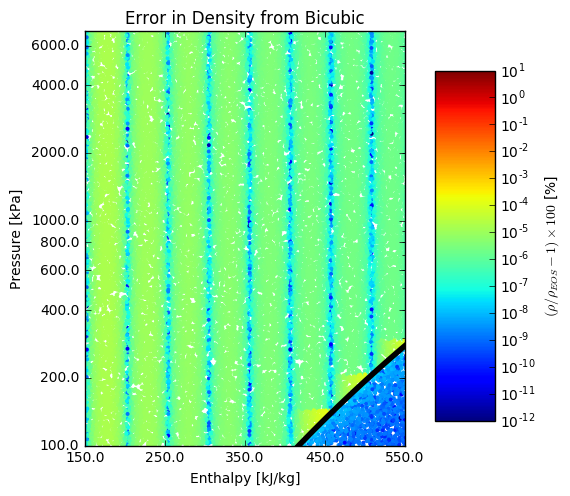

In [3]:
fig

In [21]:
table = np.array([ [x,y,z] for x,y,z in zip(HHH2, PPP2, EEE2)])
table[0]
frame = pd.DataFrame(data=table, columns=['Enthalpy (kJ/kg)','Pressure (kPA)', 'The Other One'])
frame

,Enthalpy (kJ/kg),Pressure (kPA),The Other One
0,440042.275051,3.081752e+05,2.447394e-06
1,186157.947227,1.481718e+06,1.437183e-05
2,260064.457755,3.597691e+05,1.250049e-06
3,417426.495058,2.502419e+06,1.302015e-06
4,478991.122855,7.829166e+05,2.353377e-06
5,422633.211264,1.420539e+05,9.801366e-06
6,191768.117644,2.277907e+05,8.815199e-06
7,185637.254033,3.371223e+05,1.478568e-05
8,406687.493837,6.007236e+05,4.480416e-10
9,271845.831115,2.001522e+06,6.139923e-06
